<a href="https://colab.research.google.com/github/THABOR7677/Machine-Learning-Models/blob/main/Calories_Burnt_Predictor_using_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dependencies and Librararies**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collection and Analysis**

In [6]:
#loading the dataset into a pandas Dataframe
calories = pd.read_csv('/content/calories.csv')

In [7]:
# loading the first 5 rows
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [9]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Combining the Two DataFrames**

In [10]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [11]:
#Printing the new Concaectinated DataFrame
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
# checking the Data point of the DataFrame
calories_data.shape

(15000, 9)

In [13]:
# Checking DataFrame information
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
# Checking for Missing Values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
# Checking for Statistical measures
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# **Data Visualization**

In [17]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

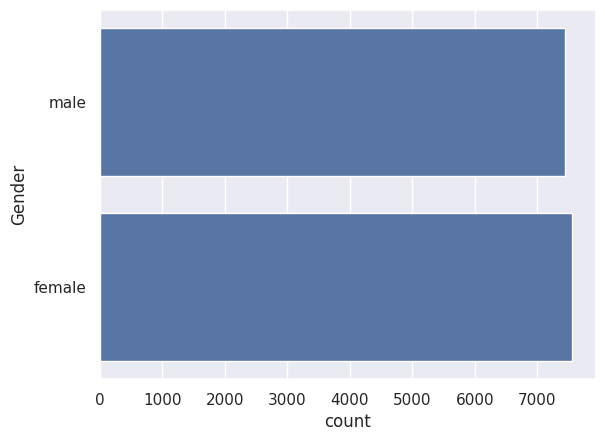

In [19]:
# plotting the Gender column into a count plot
sns.countplot(calories_data['Gender'])

<ipython-input-20-f3d4c23178ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

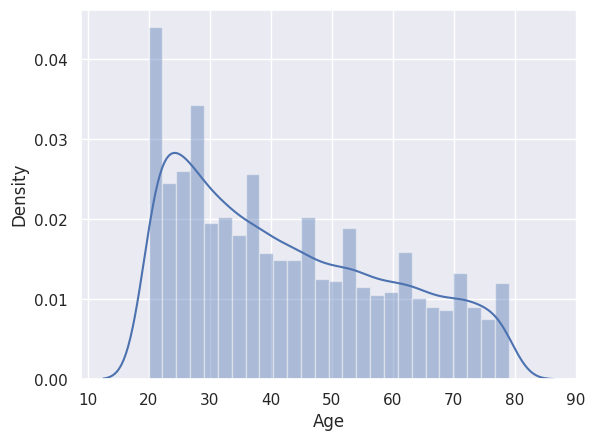

In [20]:
# plotting the Distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-23-b511ec0387d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

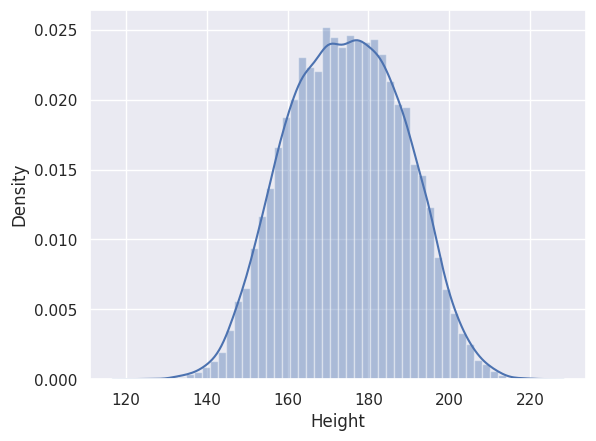

In [23]:
# plotting the Distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-25-d08d0d053f7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

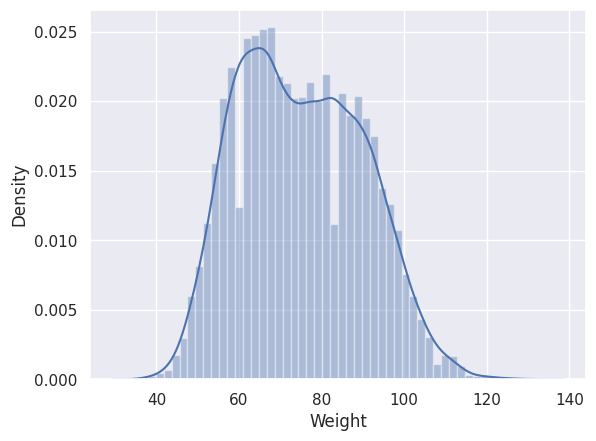

In [25]:
# plotting the Distribution of "Weight" column
sns.distplot(calories_data['Weight'])

<Axes: xlabel='Duration', ylabel='Count'>

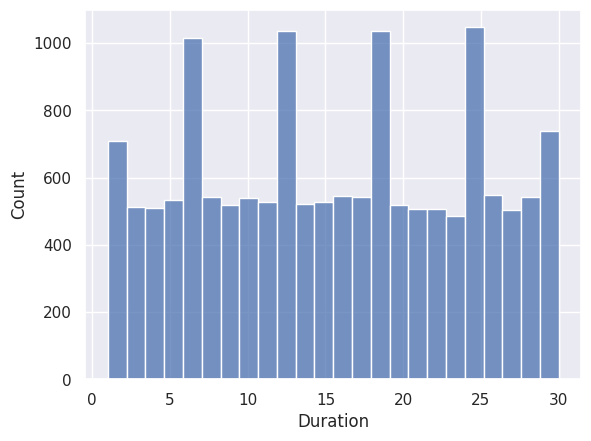

In [28]:
# plotting the Distribution of "Duration" column
sns.histplot(calories_data['Duration'])

<ipython-input-31-19518ad7e7f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

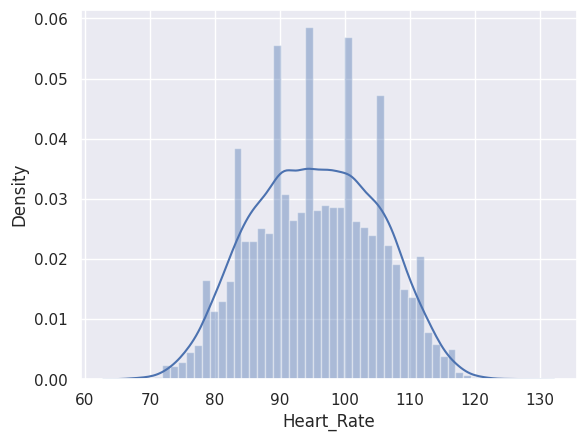

In [31]:
# plotting the Distribution of "Heart_Rate" column
sns.distplot(calories_data['Heart_Rate'])

<ipython-input-32-439a92c803e7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

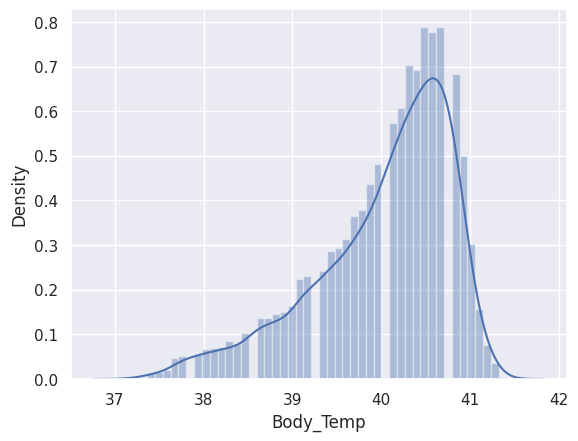

In [32]:
# plotting the Distribution of "Body_Temp" column
sns.distplot(calories_data['Body_Temp'])

**Converting the categorical Data into numerical data**

Encoding the Gender column

In [35]:
calories_data.replace({'Gender':{'male':1, 'female':0}}, inplace=True)

In [41]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# **Finding the Correlation between the dataset**

---> Positive Correlation


---> Negative Correlation

In [36]:
correlation = calories_data.corr()

<Axes: >

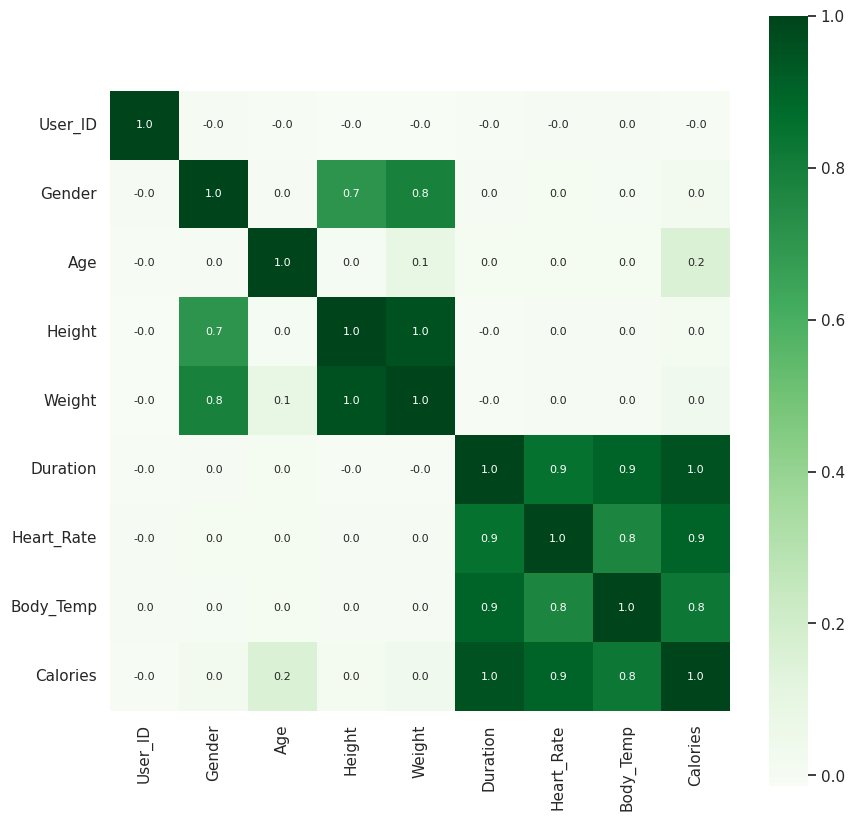

In [40]:
# Constructing a heatmap to understand the Correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

# **Separating Features and Target**

In [43]:
x = calories_data.drop(columns=['User_ID', 'Gender'], axis=1)
y = calories_data['Calories']

In [44]:
print(x)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       68   190.0    94.0      29.0       105.0       40.8     231.0
1       20   166.0    60.0      14.0        94.0       40.3      66.0
2       69   179.0    79.0       5.0        88.0       38.7      26.0
3       34   179.0    71.0      13.0       100.0       40.5      71.0
4       27   154.0    58.0      10.0        81.0       39.8      35.0
...    ...     ...     ...       ...         ...        ...       ...
14995   20   193.0    86.0      11.0        92.0       40.4      45.0
14996   27   165.0    65.0       6.0        85.0       39.2      23.0
14997   43   159.0    58.0      16.0        90.0       40.1      75.0
14998   78   193.0    97.0       2.0        84.0       38.3      11.0
14999   63   173.0    79.0      18.0        92.0       40.5      98.0

[15000 rows x 7 columns]


In [45]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Splitting the data into training and Testing data**

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [47]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# **Model Training **

**XGBoost Regressor**

In [48]:
# Loading the Model
model = XGBRegressor()

In [49]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Evaluation**

**Prediction on the Test Data**

In [50]:
test_data_prediction = model.predict(x_test)

In [51]:
print(test_data_prediction)

[127.042625 222.93399   38.00324  ... 144.89012   23.975231  90.0027  ]


**Mean Absolute Error **

In [52]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [54]:
print('The Mean Absolute Error: ', mae)

The Mean Absolute Error:  0.14680286494890848
